In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [4]:
heights = [ [1.6],[1.65],[1.7], [1.73],[1.8] ]
weights = [ [60], [65],  [72.3],[75],  [80] ]


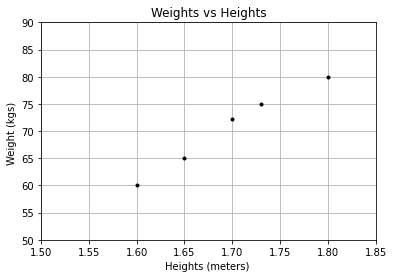

In [5]:
plt.title('Weights vs Heights')
plt.xlabel('Heights (meters) ')
plt.ylabel('Weight (kgs) ')
plt.plot(heights, weights, 'k.')
plt.axis([1.5,1.85,50,90])
plt.grid(True)

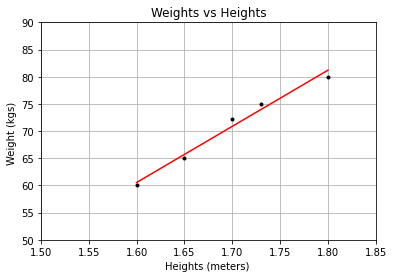

In [7]:
# fit the model and generated same plot with data points and Regression line
model.fit(X=heights, y=weights)

plt.title('Weights vs Heights')
plt.xlabel('Heights (meters) ')
plt.ylabel('Weight (kgs) ')
plt.plot(heights, weights, 'k.')
plt.axis([1.5,1.85,50,90])
plt.grid(True)
# plt.plot(heights, weights, 'b')
# plot regression line
plt.plot(heights, model.predict(heights), color='r')
# axis range for x and y v


In [8]:
# display mx + b parameters from the LinearRegression model
print('Model Intercept', model.intercept_[0])
print('Model Slope', model.coef_[0][0])

Model Intercept -104.75454545454545
Model Slope 103.31046312178387
